In [0]:
import matplotlib.pyplot as plt

In [0]:
#https://www.learnopencv.com/image-classification-using-convolutional-neural-networks-in-keras/
# https://keras.io/datasets/
#https://www.scipy-lectures.org/advanced/scikit-learn/#putting-it-all-together-face-recognition
# https://www.pyimagesearch.com/2017/12/11/image-classification-with-keras-and-deep-learning/

In [3]:
#from keras.datasets import mnist
#(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

from keras.datasets import cifar10

(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()



Using TensorFlow backend.


170500096/170498071 [==============================] - 76s 0us/step


In [4]:
#print(train_images)
print(len(train_labels))

50000


In [5]:
print(train_images[0])

[[[ 59  62  63]
  [ 43  46  45]
  [ 50  48  43]
  ...
  [158 132 108]
  [152 125 102]
  [148 124 103]]

 [[ 16  20  20]
  [  0   0   0]
  [ 18   8   0]
  ...
  [123  88  55]
  [119  83  50]
  [122  87  57]]

 [[ 25  24  21]
  [ 16   7   0]
  [ 49  27   8]
  ...
  [118  84  50]
  [120  84  50]
  [109  73  42]]

 ...

 [[208 170  96]
  [201 153  34]
  [198 161  26]
  ...
  [160 133  70]
  [ 56  31   7]
  [ 53  34  20]]

 [[180 139  96]
  [173 123  42]
  [186 144  30]
  ...
  [184 148  94]
  [ 97  62  34]
  [ 83  53  34]]

 [[177 144 116]
  [168 129  94]
  [179 142  87]
  ...
  [216 184 140]
  [151 118  84]
  [123  92  72]]]


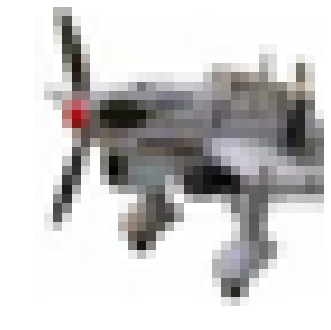

In [21]:
plt.axis("off")
plt.imshow(train_images[49])
plt.show()

In [0]:
# outros dados
# https://sites.google.com/view/11khands
# http://www.scielo.org.mx/pdf/cys/v19n3/v19n3a7.pdf

In [8]:
'''
import zipfile, urllib.request, shutil

url = 'https://github.com/garythung/trashnet/blob/master/data/dataset-resized.zip'
file_name = 'dataset-resized.zip'

with urllib.request.urlopen(url) as response, open(file_name, 'wb') as out_file:
    shutil.copyfileobj(response, out_file)
    with zipfile.ZipFile(file_name) as zf:
        zf.extractall()
'''

"\nimport zipfile, urllib.request, shutil\n\nurl = 'https://github.com/garythung/trashnet/blob/master/data/dataset-resized.zip'\nfile_name = 'dataset-resized.zip'\n\nwith urllib.request.urlopen(url) as response, open(file_name, 'wb') as out_file:\n    shutil.copyfileobj(response, out_file)\n    with zipfile.ZipFile(file_name) as zf:\n        zf.extractall()\n"

In [9]:
# este comando clona o diretorio github ucfilho/ANN no colaboratory research
#!git clone https://github.com/garythung/trashnet/tree/master/data
!git clone https://github.com/garythung/trashnet

Cloning into 'trashnet'...
remote: Enumerating objects: 33, done.
remote: Total 33 (delta 0), reused 0 (delta 0), pack-reused 33
Unpacking objects: 100% (33/33), done.


In [10]:

# este comando objetiva direcionar para pasta ANN (fazer isto p achar os dados)
%cd data
# este comando visualiza os arquivos disponiveis p download
! ls

[Errno 2] No such file or directory: 'data'
/content
PhD  sample_data  trashnet


In [11]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('../data/',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

test_set = test_datagen.flow_from_directory('../data/',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

FileNotFoundError: ignored

In [0]:
'''
# importing required modules 
from zipfile import ZipFile 
  
# specifying the zip file name 
file_name = "dataset-resized.zip"
  
# opening the zip file in READ mode 
with ZipFile(file_name, 'r') as zip: 
    # printing all the contents of the zip file 
    zip.printdir() 
  
    # extracting all the files 
    print('Extracting all the files now...') 
    zip.extractall() 
    print('Done!') 
'''

In [0]:
import zipfile
from io import StringIO
import io
#from StringIO import StringIO
from PIL import Image
import imghdr

imgzip = open('dataset-resized.zip')
zippedImgs = zipfile.ZipFile(imgzip)

for i in xrange(len(zippedImgs.namelist())):
    print ("iter", i, " ",file_in_zip = zippedImgs.namelist()[i])
    if (".jpg" in file_in_zip or ".JPG" in file_in_zip):
        print("Found image: ", file_in_zip, " -- ",data = zippedImgs.read(file_in_zip)) 
        dataEnc = StringIO(data)
        img = Image.open(dataEnc)
        print(img) 
    else:
        print("") 

In [0]:
'''
!pip install keras-tqdm
import keras
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from keras_tqdm import TQDMNotebookCallback
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.constraints import maxnorm
from keras.optimizers import SGD
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from keras.callbacks import Callback

from sklearn.model_selection import train_test_split

from keras.preprocessing.image import img_to_array, load_img
from keras import layers, models, optimizers
from keras import backend as K
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix
import itertools

import matplotlib.image as mpimg
import seaborn as sns
'''

In [0]:

''' 
def createModel():

    model = keras.models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), input_shape=(32, 32, 3)))
    model.add(layers.Activation('relu'))
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))
    model.add(layers.Conv2D(32, (3, 3)))
    model.add(layers.Activation('relu'))
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))
    
    model.add(layers.Conv2D(64, (3, 3)))
    model.add(layers.Activation('relu'))
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))
    model.add(layers.Flatten())
    model.add(layers.Dense(64))
    model.add(layers.Activation('relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(10))
    model.add(layers.Activation('softmax'))

    return model
    
'''

In [0]:
'''model1 = createModel()
batch_size = 30
epochs = 100
model1.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
 
history = model1.fit(train_images, train_labels, batch_size=batch_size, epochs=epochs, verbose=1, 
                   validation_data=(test_images, test_labels))
 
 
model1.evaluate(test_images, test_labels)
'''

In [0]:
'''
# Loss Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)
 
# Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['acc'],'r',linewidth=3.0)
plt.plot(history.history['val_acc'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)
'''


In [0]:
'''
from keras.preprocessing.image import ImageDataGenerator
 
ImageDataGenerator(
    rotation_range=10.,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.,
    zoom_range=.1.,
    horizontal_flip=True,
    vertical_flip=True)
    
  '''

In [0]:
'''
from keras.preprocessing.image import ImageDataGenerator
 
model2 = createModel()
 
model2.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
 
batch_size = 256
epochs = 100
datagen = ImageDataGenerator(
#         zoom_range=0.2, # randomly zoom into images
#         rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False)  # randomly flip images
 
# Fit the model on the batches generated by datagen.flow().
history2 = model2.fit_generator(datagen.flow(train_data, train_labels_one_hot, batch_size=batch_size),
                              steps_per_epoch=int(np.ceil(train_data.shape[0] / float(batch_size))),
                              epochs=epochs,
                              validation_data=(test_data, test_labels_one_hot),
                              workers=4)
 
model2.evaluate(test_data, test_labels_one_hot)

'''

In [0]:
'''

# Loss Curves
plt.figure(figsize=[8,6])
plt.plot(history2.history['loss'],'r',linewidth=3.0)
plt.plot(history2.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)
 
# Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(history2.history['acc'],'r',linewidth=3.0)
plt.plot(history2.history['val_acc'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

'''